# **Predict Equipment's Signal Quality**

**Given:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals.

The data set shared by the company contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality


**Objective:** Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters

For this, I need to build a regressor which can use these parameters to determine the signal strength or quality [as number].

In [392]:
import tensorflow
tensorflow.__version__

'2.4.1'

# Importing Some of the Important Libraries

In [393]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### Connecting to Gdrive 

In [394]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Loading the Data

In [395]:
data = pd.read_csv("/content/gdrive/MyDrive/AIML/NN project /Part- 1,2&3 - Signal.csv")

## **Exploratory Data Anaysis**

In [396]:
data.head()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

In [156]:
data.shape

(1599, 12)

**Observations:**

*   There are a 11 features ( Parameter 1 - 11 ) 
*   The column "Signal_Strength" is a target variable 



In [ ]:
data.describe().transpose()

count       mean        std  ...       50%        75%        max
Parameter 1      1599.0   8.319637   1.741096  ...   7.90000   9.200000   15.90000
Parameter 2      1599.0   0.527821   0.179060  ...   0.52000   0.640000    1.58000
Parameter 3      1599.0   0.270976   0.194801  ...   0.26000   0.420000    1.00000
Parameter 4      1599.0   2.538806   1.409928  ...   2.20000   2.600000   15.50000
Parameter 5      1599.0   0.087467   0.047065  ...   0.07900   0.090000    0.61100
Parameter 6      1599.0  15.874922  10.460157  ...  14.00000  21.000000   72.00000
Parameter 7      1599.0  46.467792  32.895324  ...  38.00000  62.000000  289.00000
Parameter 8      1599.0   0.996747   0.001887  ...   0.99675   0.997835    1.00369
Parameter 9      1599.0   3.311113   0.154386  ...   3.31000   3.400000    4.01000
Parameter 10     1599.0   0.658149   0.169507  ...   0.62000   0.730000    2.00000
Parameter 11     1599.0  10.422983   1.065668  ...  10.20000  11.100000   14.90000
Signal_Strength  1599.0   5.636023   0.807569  ...   6.00000   6.000000    8.00000

[12 rows x 8 columns]

**Observations**



*   The target variabls, Signal_Strength, seems to have values from 3 to 8 - all integer values 
*   All the other values need to be normalised 



In [ ]:
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

Observation: 


*   There are no critical null values 



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Obserbation: 




*   The data type of the features are all float - which is ok 
*   The target variable is of data type Int 





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

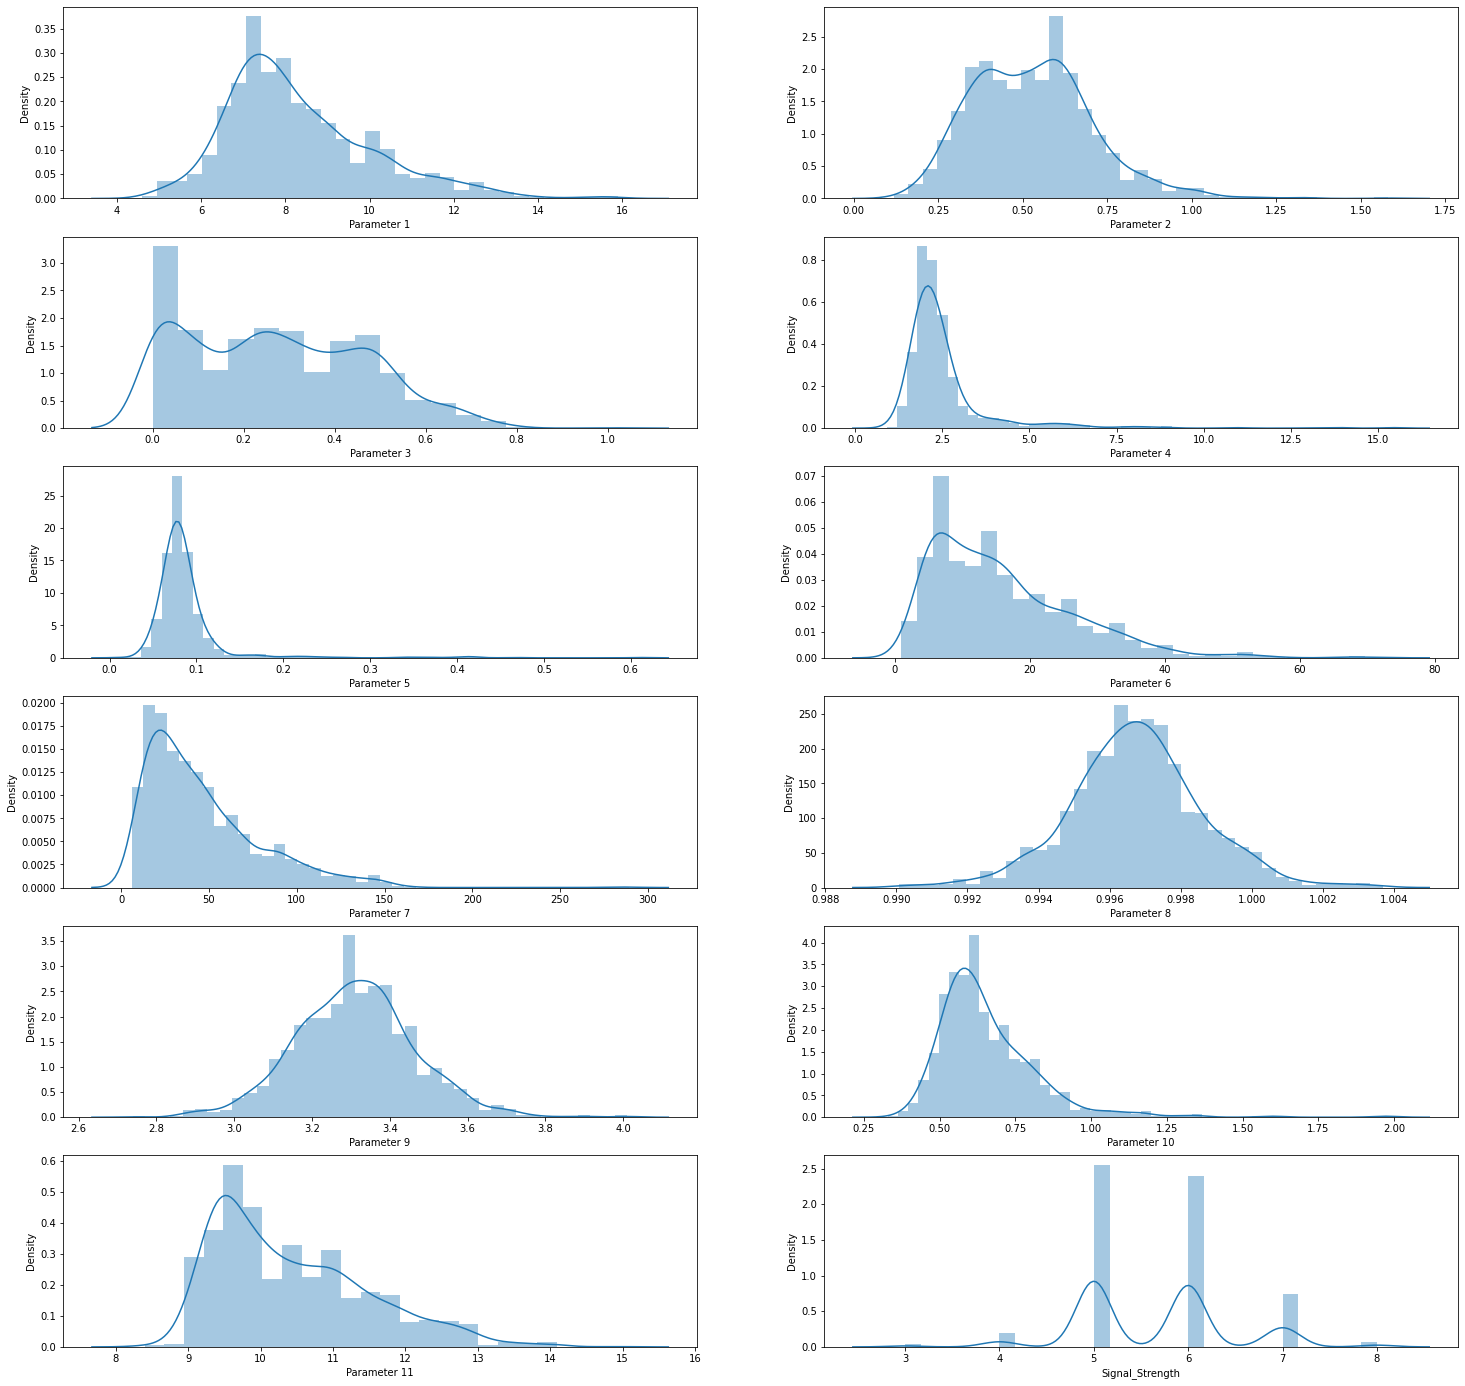

In [ ]:
plt.figure(figsize=(25, 50))
column = 1
for i in data.columns:
    plt.subplot(12, 2, column)
    sns.distplot(data[i])
    column = column + 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

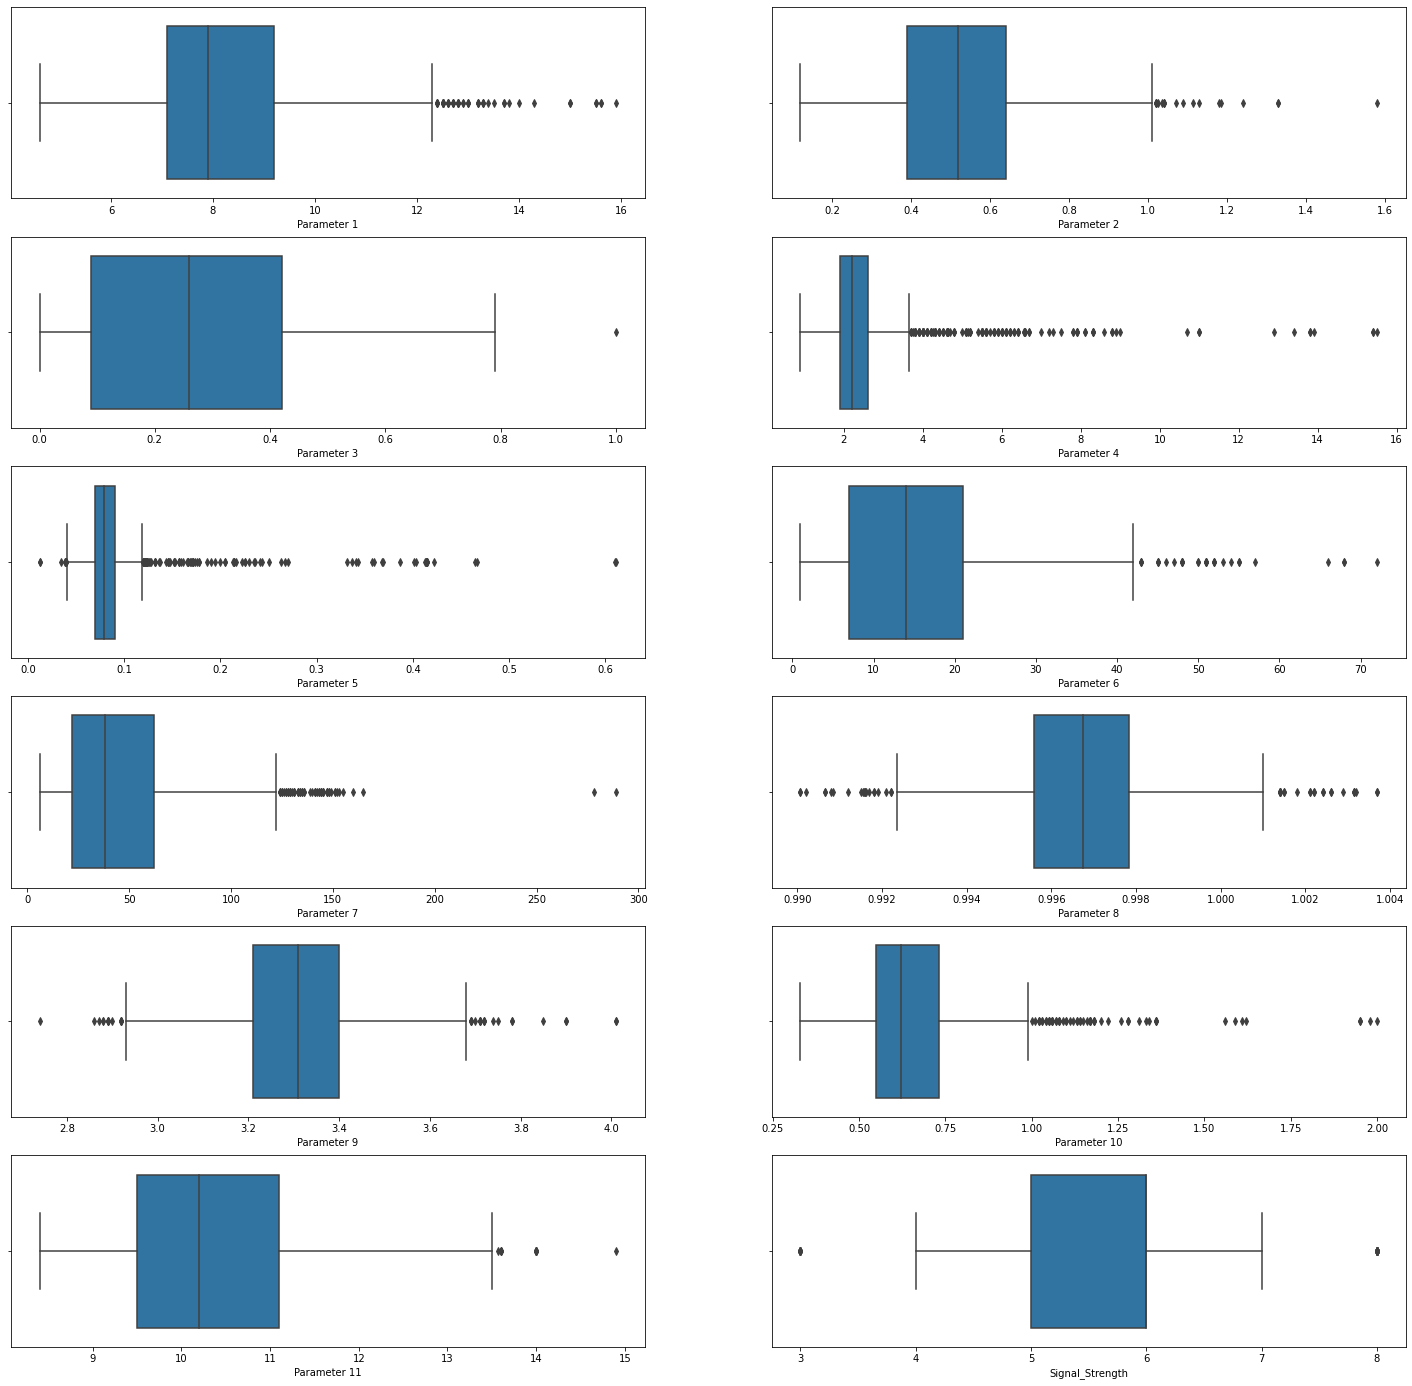

In [ ]:
plt.figure(figsize=(25, 50))
col = 1
for i in data.columns:
    plt.subplot(12, 2, col)
    sns.boxplot(data[i])
    col += 1 

**Observations:**


*   Many of the features have outliers 
*   These Outliers have to be handled 




In [ ]:
sns.pairplot(data, diag_kind = 'kde')

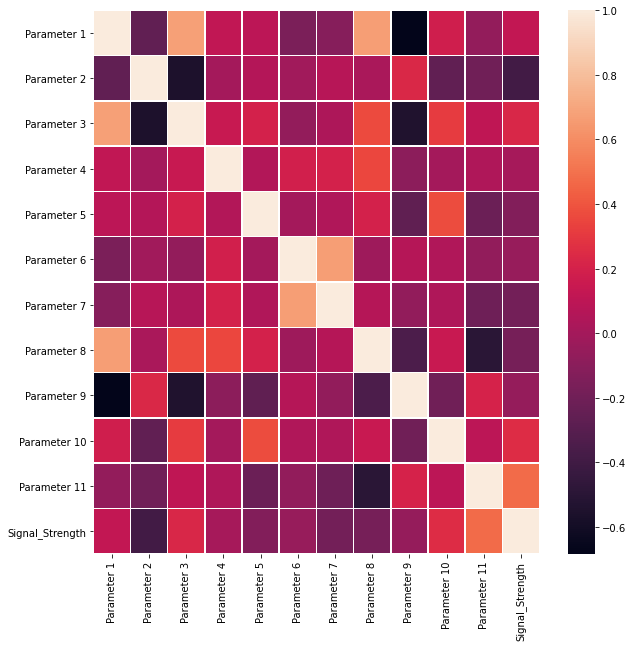

In [133]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), linewidths=.5, ax=ax)

**Observations:**



*   There is not much correlation amoungst the features 
*   There is no major co-relation between any of the features and the target variable 
*   There seems to be 2-3 clusters of data, based on the peaks in the charts 







### **Data Preprocessing**

## Spliting data for Training and Testing

In [397]:
y = data["Signal_Strength"]
x = data.drop("Signal_Strength", axis=1) # Assigning all the other columns to x
from scipy.stats import zscore # z score transformation 
XS = x.apply(zscore)

In [398]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [400]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XS, y, test_size=0.15, random_state=10)

### Regressor Model to Identify the Signal Strength or Quality

In [406]:
# Trying model with Sigmoid layer 
model_nn_r =  Sequential()
model_nn_r.add(Dense(256, input_shape=(11, )))
model_nn_r.add(Dense(256, activation="sigmoid"))
model_nn_r.add(Dense(126, activation="sigmoid"))
model_nn_r.add(Dense(64, activation="relu"))
model_nn_r.add(Dense(32, activation="relu"))
model_nn_r.add(Dense(8, activation="relu"))
model_nn_r.add(Dense(1))
model_nn_r.add(Activation("relu")) 
model_nn_r.compile(optimizer="adam",loss='mse') 
model_nn_r.fit(x_train,y_train,epochs = 100,validation_split=0.2,verbose=0)

In [411]:
model_nn_r.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4867


0.4866875112056732

In [407]:
# Trying with only Relu and Linear as later layer 
model_nn_r_2 =  Sequential()
model_nn_r_2.add(Dense(256, input_shape=(11, )))
model_nn_r_2.add(Dense(256, activation="relu"))
model_nn_r_2.add(Dense(126, activation="relu"))
model_nn_r_2.add(Dense(64, activation="relu"))
model_nn_r_2.add(Dense(32, activation="relu"))
model_nn_r_2.add(Dense(8, activation="relu"))
model_nn_r_2.add(Dense(1))
model_nn_r_2.add(Activation("linear")) 
model_nn_r_2.compile(optimizer="adam",loss='mse') 
model_nn_r_2.fit(x_train,y_train,epochs = 100,validation_split=0.2,verbose=0)

In [413]:
model_nn_r_2.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5786


0.5786004662513733

In [408]:
# Trying with BatchNormalisation
model_nn_r_3 =  Sequential()
model_nn_r_3.add(Dense(256, input_shape=(11, )))
model_nn_r_3.add(BatchNormalization())
model_nn_r_3.add(Dense(256, activation="relu"))
model_nn_r_3.add(Dense(126, activation="relu"))
model_nn_r_3.add(Dense(64, activation="relu"))
model_nn_r_3.add(Dense(32, activation="relu"))
model_nn_r_3.add(Dense(8, activation="relu"))
model_nn_r_3.add(Dense(1))
model_nn_r_3.add(Activation("linear")) 
model_nn_r_3.compile(optimizer="adam",loss='mse') 
model_nn_r_3.fit(x_train,y_train,epochs = 100,validation_split=0.2,verbose=)

In [414]:
model_nn_r_3.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5601


0.5600517988204956

In [415]:
# Trying with BatchNormalisation & Drop Outs
model_nn_r_4 =  Sequential()
model_nn_r_4.add(Dense(256, input_shape=(11, )))
model_nn_r_4.add(BatchNormalization())
model_nn_r_4.add(Dense(256, activation="relu"))
model_nn_r_4.add(Dense(126, activation="relu"))
model_nn_r_4.add(Dropout(.3))
model_nn_r_4.add(Dense(64, activation="relu"))
model_nn_r_4.add(Dense(32, activation="relu"))
model_nn_r_4.add(Dropout(.3))
model_nn_r_4.add(Dense(8, activation="relu"))
model_nn_r_4.add(Dense(1))
model_nn_r_4.add(Activation("linear")) 
model_nn_r_4.compile(optimizer="adam",loss='mse') 
model_nn_r_4.fit(x_train,y_train,epochs = 100,validation_split=0.2,verbose=0)
model_nn_r_4.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 3.2001


3.2000558376312256

In [416]:
# Trying with BatchNormalisation & Drop Outs
model_nn_r_5 =  Sequential()
model_nn_r_5.add(Dense(256, input_shape=(11, )))
model_nn_r_5.add(Dense(126, activation="relu"))
model_nn_r_5.add(Dense(126, activation="relu"))
model_nn_r_5.add(Dense(126, activation="relu"))
model_nn_r_5.add(Dense(126, activation="relu"))
model_nn_r_5.add(Dense(64, activation="relu"))
model_nn_r_5.add(Dense(32, activation="relu"))
model_nn_r_5.add(Dense(32, activation="relu"))
model_nn_r_5.add(Dense(32, activation="relu"))
model_nn_r_5.add(Dense(8, activation="relu"))
model_nn_r_5.add(Dense(1))
model_nn_r_5.add(Activation("relu")) 
model_nn_r_5.compile(optimizer="adam",loss='mse') 
model_nn_r_5.fit(x_train,y_train,epochs = 100,validation_split=0.2,verbose=0)
model_nn_r_5.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5752


0.5751675963401794

In [417]:
# Using the best model to calculate the Mean Square error 
y_pred = model_nn_r_5.predict(x_test)
for i in range(0,len(y_pred)):
  y_pred[i] = int(y_pred[i])
import math
mse = math.sqrt(np.sum((y_pred-y_test.to_numpy())**2))/len(y_pred)

In [418]:
mse

1.345697877600235

### Classifier Model To Identify Signal Strength or Quality

In [419]:
y_test_c = pd.get_dummies(y_test)

In [420]:
y_train_c = pd.get_dummies(y_train)

In [421]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [422]:
# Trying model with Dropout and different activation functions 
model_nn_c =  Sequential()
model_nn_c.add(Dense(128, input_shape=(11, )))
model_nn_c.add(Dense(64, activation="sigmoid"))
model_nn_c.add(Dense(64, activation="sigmoid"))
model_nn_c.add(Dense(64, activation="relu"))
model_nn_c.add(tensorflow.keras.layers.Dropout(.5))
model_nn_c.add(Dense(32, activation="relu"))
model_nn_c.add(Dense(16, activation="relu"))
model_nn_c.add(Dense(6))
model_nn_c.add(Activation("softmax"))
model_nn_c.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model_nn_c.fit(x_train,y_train_c,batch_size = 32, epochs = 200,validation_data=(x_test,y_test_c),verbose=0)
result = model_nn_c.evaluate(x_test,y_test_c)
print(result)

8/8 [==============================] - 0s 2ms/step - loss: 1.6688 - accuracy: 0.6292
[1.6687848567962646, 0.6291666626930237]


In [423]:
# Trying model with Dropout & batchnormalisation and different activation functions 
model_nn_c_2 =  Sequential()
model_nn_c_2.add(Dense(128, input_shape=(11, )))
model_nn_c_2.add(Dense(64, activation="sigmoid"))
model_nn_c_2.add(BatchNormalization())
model_nn_c_2.add(Dense(64, activation="sigmoid"))
model_nn_c_2.add(Dense(64, activation="relu"))
model_nn_c_2.add(tensorflow.keras.layers.Dropout(.5))
model_nn_c_2.add(Dense(32, activation="relu"))
model_nn_c_2.add(Dense(16, activation="relu"))
model_nn_c_2.add(Dense(6))
model_nn_c_2.add(Activation("softmax"))
model_nn_c_2.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model_nn_c_2.fit(x_train,y_train_c,batch_size = 32, epochs = 200,validation_data=(x_test,y_test_c),verbose=0)
result = model_nn_c_2.evaluate(x_test,y_test_c)
print(result)

8/8 [==============================] - 0s 2ms/step - loss: 1.7339 - accuracy: 0.6500
[1.7339364290237427, 0.6499999761581421]


In [424]:
# Incresing the Epochs and removing the dropout layer 
model_nn_c_3 =  Sequential()
model_nn_c_3.add(Dense(128, input_shape=(11, )))
model_nn_c_3.add(Dense(64, activation="relu"))
model_nn_c_3.add(BatchNormalization())
model_nn_c_3.add(Dense(64, activation="relu"))
model_nn_c_3.add(Dense(64, activation="relu"))
model_nn_c_3.add(Dense(32, activation="relu"))
model_nn_c_3.add(Dense(16, activation="relu"))
model_nn_c_3.add(Dense(6))
model_nn_c_3.add(Activation("softmax"))
model_nn_c_3.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model_nn_c_3.fit(x_train,y_train_c,batch_size = 32, epochs = 300,validation_data=(x_test,y_test_c),verbose=0)
result = model_nn_c_3.evaluate(x_test,y_test_c)
print(result)

8/8 [==============================] - 0s 2ms/step - loss: 2.6756 - accuracy: 0.6375
[2.6755661964416504, 0.637499988079071]


In [425]:
# Restructuring the network
model_nn_c_4 =  Sequential()
model_nn_c_4.add(Dense(256, input_shape=(11, )))
model_nn_c_4.add(Dense(128, activation="relu"))
model_nn_c_4.add(Dense(64, activation="relu"))
model_nn_c_4.add(Dense(32, activation="relu"))
model_nn_c_4.add(Dense(16, activation="relu"))
model_nn_c_4.add(Dense(6))
model_nn_c_4.add(Activation("softmax"))
model_nn_c_4.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model_nn_c_4.fit(x_train,y_train_c,batch_size = 32, epochs = 300,validation_data=(x_test,y_test_c),verbose=0)
result = model_nn_c_4.evaluate(x_test,y_test_c)
print(result)

8/8 [==============================] - 0s 2ms/step - loss: 4.3984 - accuracy: 0.6250
[4.398352146148682, 0.625]


### Observations: 

*   The regression strategy for the problem is not a suitable one. The classifier is surely a better fit 
*   During the process of tuning the model, variouss options such as

> dropping nuerons

> Batch normaliser 

  we tired, but it was not effectively adding value 

*   Relu was the most effective activation function 








Code for GUI to Run Models 

In [ ]:
import tkinter as tk
from tkinter import ttk
import re

win = tk.Tk()
win.title("Signal Quality Predictor")
Name=ttk.Label(win,text="Step1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var = tk.StringVar()
Name_entrybox=ttk.Entry(win,width=32,textvariable=Name_var)
Name_exterybox.grid(row=0,column=1))

def Import_Data():
    global DB
    DF_Name = Name_var.get()
    DB_extension=re.findall("\..*",DF_Name)
    if DB_extension==[".xlsx"]:
        DB=pd.read_excel(DF_Name)
    elif DB_extension==[".csv"]:
        DB=pd.read_csv(DF_Name)
    confirm="Done"
    confirm_entrybox=ttk.Entry(win,width=16)
    confirm_entrybox=ttk.grid(row=1,Column=3)
    confirm_entrybox.insert(1,str(confirm))

Import_Data_Button=ttk.Button(win,text="Import Data",command=Import_Data)
IMport_Data_Button.grid(row=0,column=2)

Name_tr=ttk.Label(win,text="Step2: Target Variable")
Name_tr.grid(row=1,column=0,sticky=tk.W)

Target_var = tk.StringVar()
Name_entrybox=ttk.Entry(win,width=32,textvariable=Target_var)
Name_exterybox.grid(row=1,column=1))

def Get_Target():
    global DF_Target
    DF_Target = Target_var.get()
    DB_extension=re.findall("\..*",DF_Target)
    if(DF_Target in DB.columns):
        y = DB.DF_Target
        state = "found"
    else:
        state = "not found"
    confirm= state
    confirm_entrybox=ttk.Entry(win,width=16)
    confirm_entrybox=ttk.grid(row=2,Column=3)
    confirm_entrybox.insert(1,str(confirm))
    
def button_event_1(event):
    model_nn_r_5 =  Sequential()
    model_nn_r_5.add(Dense(256, input_shape=(11, )))
    model_nn_r_5.add(Dense(126, activation="relu"))
    model_nn_r_5.add(Dense(126, activation="relu"))
    model_nn_r_5.add(Dense(126, activation="relu"))
    model_nn_r_5.add(Dense(126, activation="relu"))
    model_nn_r_5.add(Dense(64, activation="relu"))
    model_nn_r_5.add(Dense(32, activation="relu"))
    model_nn_r_5.add(Dense(32, activation="relu"))
    model_nn_r_5.add(Dense(32, activation="relu"))
    model_nn_r_5.add(Dense(8, activation="relu"))
    model_nn_r_5.add(Dense(1))
    model_nn_r_5.add(Activation("relu")) 
    model_nn_r_5.compile(optimizer="adam",loss='mse') 
    model_nn_r_5.fit(x_train,y_train,epochs = 100,validation_split=0.2,verbose=0)
    model_nn_r_5.evaluate(x_test,y_test)
    confirm_entrybox=ttk.Entry(win,width=16)
    confirm_entrybox=ttk.grid(row=3,Column=3)
    confirm_entrybox.insert(1,str("Trained"))
    

Import_Data_Button=ttk.Button(win,text="Get Target",command=Get_Target)
IMport_Data_Button.grid(row=1,column=2)


Name_NNR=ttk.Label(win,text="Step3: Run Regressor")
Name_NNR.grid(row=2,column=0,sticky=tk.W)

widget = Button(None, text='Fir Regressor')
widget.pack()
widget.bind('<Button-1>', hello)
widget.mainloop()


win.mainloop()

### Recognizing Street View Housing Number

**Problem Statement:** 
A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

**Data:** 
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: http:// docs.h5py.org/en/stable/high/dataset.html
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

**Objective:**
Build a digit classifier on the SVHN (Street View Housing Number) dataset.

In [428]:
import h5py
idata = h5py.File('/content/gdrive/MyDrive/AIML/NN project /u_wi1HDV.part', 'r')

In [429]:
# Load the training, validation and test sets
x_train = idata['X_train'][:]
y_train_o = idata['y_train'][:]
x_val = idata['X_val'][:]
y_val_o = idata['y_val'][:]
x_test = idata['X_test'][:]
y_test_o = idata['y_test'][:]

idata.close()

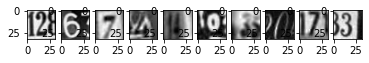

Labels : [2 6 7 4 4 0 3 0 7 3]


In [430]:
# Visualizing first 10 images in the dataset and their labels
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape((32, 32)),cmap = plt.cm.binary)
plt.show()
print('Labels : %s' % (y_train_o[0 : 10]))

Image Normalisation

In [431]:
# Reshaping the training data such that it can be fed into Keras
x_train = x_train.reshape((x_train.shape[0], -1))/255
x_val = x_val.reshape((x_val.shape[0], -1))/255
x_test = x_test.reshape((x_test.shape[0], -1))/255

In [432]:
# One hot encoding of target variables 
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

In [433]:
x_train.shape

(42000, 1024)

In [437]:
img_model = Sequential()
img_model.add(tensorflow.keras.layers.Flatten())
img_model.add((Dense(128, input_shape=(1024, ))))
img_model.add(Dense(64, activation="relu"))
img_model.add(Dense(32, activation="relu"))
img_model.add(Dense(16, activation="relu"))
img_model.add(Dense(10))
img_model.add(Activation("softmax"))
img_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
img_model.fit(x_train,y_train,batch_size = 32, epochs = 300,validation_data=(x_val,y_val))
result = img_model.evaluate(x_test,y_test)
print(result)

Epoch 1/300
1313/1313 [==============================] - 6s 4ms/step - loss: 2.3059 - accuracy: 0.0961 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/300
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/300
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.1022 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/300
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/300
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/300
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/300
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.1018 - val_loss: 2.3026 - val_ac

KeyboardInterrupt: ignored

Observation: 


*   No Gain in validation accuracy 
*   Accuracy not improving beyong .1
*   Therefore stopped he model 





In [442]:
# Changing optimizer to sgd with a learning rate 
img_model_2 = Sequential()
img_model_2.add(tensorflow.keras.layers.Flatten())
img_model_2.add((Dense(128, input_shape=(1024, ))))
img_model_2.add(Dense(64, activation="relu"))
img_model_2.add(Dense(32, activation="relu"))
img_model_2.add(Dense(16, activation="relu"))
img_model_2.add(Dense(10))
img_model_2.add(Activation("softmax"))
sgd = optimizers.SGD(lr = 0.001)
img_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
img_model_2.fit(x_train,y_train,batch_size = 200, epochs = 300,validation_data=(x_val,y_val))
result = img_model_2.evaluate(x_test,y_test)
print(result)

Epoch 1/300
210/210 [==============================] - 2s 9ms/step - loss: 2.3183 - accuracy: 0.0986 - val_loss: 2.3050 - val_accuracy: 0.0946
Epoch 2/300
210/210 [==============================] - 2s 8ms/step - loss: 2.3033 - accuracy: 0.0972 - val_loss: 2.3010 - val_accuracy: 0.1002
Epoch 3/300
210/210 [==============================] - 2s 8ms/step - loss: 2.3012 - accuracy: 0.1012 - val_loss: 2.2999 - val_accuracy: 0.1045
Epoch 4/300
210/210 [==============================] - 2s 8ms/step - loss: 2.2999 - accuracy: 0.1040 - val_loss: 2.2989 - val_accuracy: 0.1035
Epoch 5/300
210/210 [==============================] - 2s 8ms/step - loss: 2.2990 - accuracy: 0.1024 - val_loss: 2.2981 - val_accuracy: 0.1048
Epoch 6/300
210/210 [==============================] - 2s 8ms/step - loss: 2.2982 - accuracy: 0.1029 - val_loss: 2.2973 - val_accuracy: 0.1042
Epoch 7/300
210/210 [==============================] - 2s 8ms/step - loss: 2.2975 - accuracy: 0.1037 - val_loss: 2.2965 - val_accuracy: 0.1059

KeyboardInterrupt: ignored

Observation:

*   No Gain in validation accuracy
*   Accuracy not improving beyong .1
*  Therefore stopped he model



In [444]:
# Changing to adam optimiser  
img_model_3 = Sequential()
img_model_3.add((Dense(256, input_shape=(1024, ))))
img_model_3.add(Dense(128, activation="relu"))
img_model_3.add(Dense(64, activation="relu"))
img_model_3.add(Dense(10))
img_model_3.add(Activation("softmax"))
adam = optimizers.Adam(lr = 0.001)
img_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_data = img_model_3.fit(x_train,y_train,batch_size = 200, epochs = 200,validation_data=(x_val,y_val))
result = img_model_3.evaluate(x_test,y_test)
print(result)

Epoch 1/200
210/210 [==============================] - 4s 15ms/step - loss: 2.3426 - accuracy: 0.0989 - val_loss: 2.3015 - val_accuracy: 0.0937
Epoch 2/200
210/210 [==============================] - 3s 14ms/step - loss: 2.3007 - accuracy: 0.1043 - val_loss: 2.2881 - val_accuracy: 0.1023
Epoch 3/200
210/210 [==============================] - 3s 14ms/step - loss: 2.2267 - accuracy: 0.1654 - val_loss: 1.7712 - val_accuracy: 0.3553
Epoch 4/200
210/210 [==============================] - 3s 15ms/step - loss: 1.6072 - accuracy: 0.4435 - val_loss: 1.2546 - val_accuracy: 0.5957
Epoch 5/200
210/210 [==============================] - 3s 14ms/step - loss: 1.2501 - accuracy: 0.6007 - val_loss: 1.1351 - val_accuracy: 0.6436
Epoch 6/200
210/210 [==============================] - 3s 14ms/step - loss: 1.1342 - accuracy: 0.6442 - val_loss: 1.0359 - val_accuracy: 0.6740
Epoch 7/200
210/210 [==============================] - 3s 15ms/step - loss: 0.9969 - accuracy: 0.6906 - val_loss: 0.9525 - val_accuracy:

In [451]:
results3 = img_model_3.evaluate(x_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4666 - accuracy: 0.9037
Validation accuracy: 90.37


In [455]:
from sklearn.metrics import classification_report
predictions = img_model_3.predict_classes(x_test)
score = img_model_3.evaluate(x_test, y_test)
print(classification_report(y_test_o, predictions))



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


563/563 [==============================] - 1s 2ms/step - loss: 1.1329 - accuracy: 0.8217
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1814
           1       0.86      0.81      0.84      1828
           2       0.87      0.82      0.84      1803
           3       0.73      0.82      0.77      1719
           4       0.89      0.82      0.85      1812
           5       0.82      0.79      0.80      1768
           6       0.82      0.81      0.81      1832
           7       0.81      0.90      0.85      1808
           8       0.76      0.80      0.78      1812
           9       0.81      0.79      0.80      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



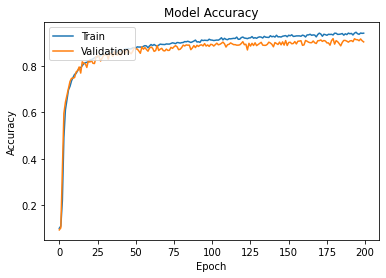

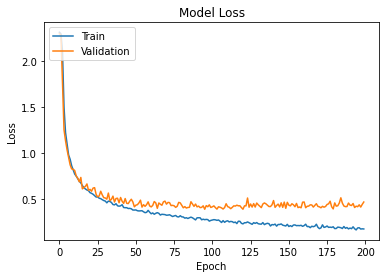

In [459]:
# summarize history for accuracy
plt.plot(model_data.history['accuracy'])
plt.plot(model_data.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Conclusion:**


*   Evaluated various models to identify the effectiveness in predicting numbers in the images 
*   Tried different optimisers, neural structures, learning rate and activation techniques 
*   Selected the model that has the highest accuracy 
*   Printed the Classification report 
*   Plotted the required plots - Loss vs Epoch and Accuracy vs Epoch





